In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import MCXGate, MCMT, ZGate, XGate, RZGate
from qiskit.quantum_info import Statevector
from qiskit.compiler import transpile
from qiskit.transpiler import CouplingMap
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_coupling_map, plot_histogram, plot_distribution
import numpy as np

In [2]:
def oracle(marked_states):

    num_qubits = len(marked_states[0])
    qc = QuantumCircuit(num_qubits, name="U$_w$")

    for target in marked_states:
        rev_target = target[::-1]
        zero_inds = [
            ind for ind in range(num_qubits) if rev_target.startswith("0", ind)
        ]
        if len(zero_inds):
            qc.x(zero_inds)
            qc.h(num_qubits - 1)
            qc.compose(MCMT(XGate(), num_qubits - 1, 1), inplace=True)
            qc.h(num_qubits - 1)
            qc.x(zero_inds)
        else:
            qc.h(num_qubits - 1)
            qc.compose(MCMT(XGate(), num_qubits - 1, 1), inplace=True)
            qc.h(num_qubits - 1)
        qc.barrier()
    return qc

In [3]:
def diffuser(qubits):
    qreg = QuantumRegister(qubits)
    qc = QuantumCircuit(qreg, name="U$_s$")
    qc.h(qreg)
    qc.x(qreg)
    qc.barrier()
    qc.h(qubits - 1)
    ctrl_state = "1" * (qubits - 1)
    U = MCXGate(qubits - 1, ctrl_state=ctrl_state)
    qc.compose(U, inplace=True)
    qc.h(qubits - 1)
    qc.barrier()
    qc.x(qreg)
    qc.h(qreg)
    return qc

In [4]:
def Grover(v, qubits):

    M = len(v)
    N = 2**qubits
    theta = np.arcsin(np.sqrt(M / N))
    R = int(np.floor(np.pi / (4 * theta)))

    qreg = QuantumRegister(qubits)
    creg = ClassicalRegister(qubits)
    qc = QuantumCircuit(qreg, creg)

    for i in range(qubits):
        qc.h(qreg[i])

    for _ in range(R):
        qc.compose(oracle(v), inplace=True)
        qc.compose(diffuser(qubits), inplace=True)

    qc.measure(qreg, creg)

    return qc

In [5]:
qubits = 5
qc = Grover(v=["10110", "10001", "11011", "01100"], qubits=qubits)
qc.depth()

44

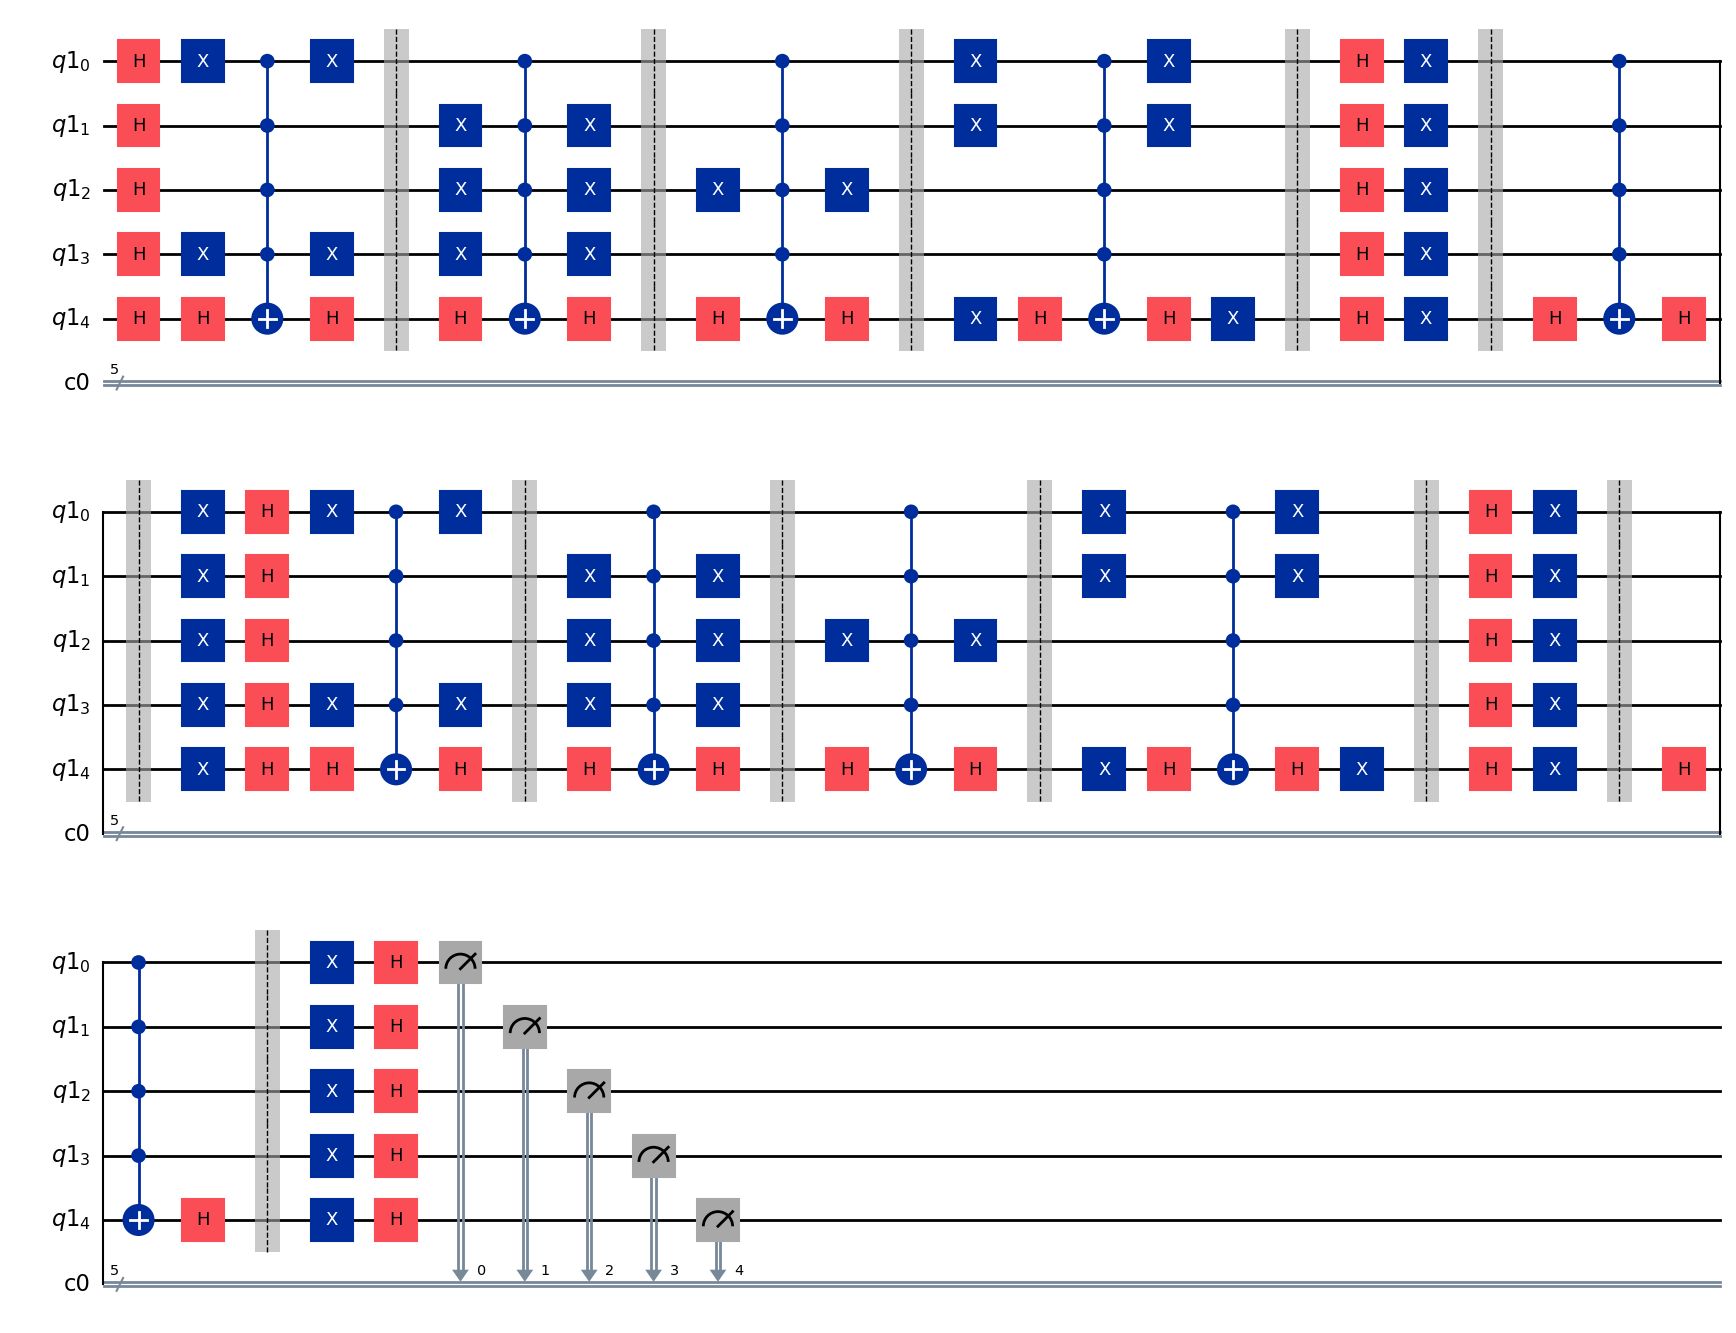

In [6]:
qc.draw("mpl")

In [7]:
test_qreg = QuantumRegister(5)
test_creg = ClassicalRegister(5)
test_qc = QuantumCircuit(test_qreg, test_creg)

U = MCXGate(qubits - 1, ctrl_state="1111")
Z = RZGate(np.pi)

# test_qc.h(test_qreg[0])
# test_qc.h(test_qreg[1])
# test_qc.h(test_qreg[2])
# test_qc.h(test_qreg[3])
# test_qc.x(test_qreg[0])
# test_qc.x(test_qreg[3])
test_qc.barrier()
test_qc.compose(U, inplace=True)
test_qc.barrier()
# test_qc.x(test_qreg[0])
# test_qc.x(test_qreg[1])
# test_qc.x(test_qreg[2])
# test_qc.compose(U, inplace=True)
# test_qc.x(test_qreg[1])
# test_qc.x(test_qreg[3])
# test_qc.compose(U, inplace=True)
# test_qc.x(test_qreg[0])
# test_qc.x(test_qreg[1])
# test_qc.x(test_qreg[2])
# test_qc.compose(Z, qubits=[4], inplace=True)
# test_qc.compose(U, inplace=True)
# test_qc.x(test_qreg[0])
# test_qc.h(test_qreg[0])
# test_qc.x(test_qreg[0])
# test_qc.x(test_qreg[1])
# test_qc.h(test_qreg[1])
# test_qc.x(test_qreg[1])
# test_qc.h(test_qreg[2])
# test_qc.x(test_qreg[2])
# test_qc.h(test_qreg[3])
# test_qc.x(test_qreg[3])
# test_qc.compose(Z, qubits=[4], inplace=True)
# test_qc.x(test_qreg[4])
# test_qc.h(test_qreg[4])
# test_qc.compose(U, inplace=True)
# test_qc.x(test_qreg[0])
# test_qc.h(test_qreg[0])
# test_qc.x(test_qreg[0])
# test_qc.x(test_qreg[1])
# test_qc.h(test_qreg[1])
# test_qc.x(test_qreg[2])
# test_qc.h(test_qreg[2])
# test_qc.x(test_qreg[3])
# test_qc.h(test_qreg[3])
# test_qc.compose(Z, qubits=[4], inplace=True)
# test_qc.h(test_qreg[4])
# test_qc.x(test_qreg[3])
# test_qc.compose(U, inplace=True)
# test_qc.x(test_qreg[0])
# test_qc.x(test_qreg[1])
# test_qc.x(test_qreg[2])
# test_qc.compose(U, inplace=True)
# test_qc.x(test_qreg[1])
# test_qc.x(test_qreg[3])
# test_qc.compose(U, inplace=True)
# test_qc.x(test_qreg[0])
# test_qc.x(test_qreg[1])
# test_qc.x(test_qreg[2])
# test_qc.compose(Z, qubits=[4], inplace=True)
# test_qc.compose(U, inplace=True)
# test_qc.x(test_qreg[0])
# test_qc.h(test_qreg[0])
# test_qc.x(test_qreg[0])
# test_qc.x(test_qreg[1])
# test_qc.h(test_qreg[1])
# test_qc.x(test_qreg[1])
# test_qc.h(test_qreg[2])
# test_qc.x(test_qreg[2])
# test_qc.h(test_qreg[3])
# test_qc.x(test_qreg[3])
# test_qc.compose(Z, qubits=[4], inplace=True)
# test_qc.x(test_qreg[4])
# test_qc.h(test_qreg[4])
# test_qc.compose(U, inplace=True)
# test_qc.x(test_qreg[0])
# test_qc.h(test_qreg[0])
# test_qc.x(test_qreg[1])
# test_qc.h(test_qreg[1])
# test_qc.x(test_qreg[2])
# test_qc.h(test_qreg[2])
# test_qc.x(test_qreg[3])
# test_qc.h(test_qreg[3])
# test_qc.compose(Z, qubits=[4], inplace=True)

# test_qc.measure(test_qreg, test_creg)

test_qc.depth()

1

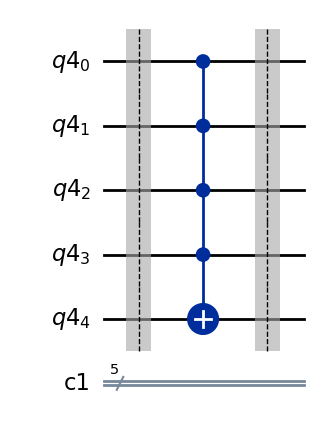

In [8]:
test_qc.draw("mpl")

In [9]:
simulator = AerSimulator()
basis_gates = ["x", "cx", "rz", "h"]

996


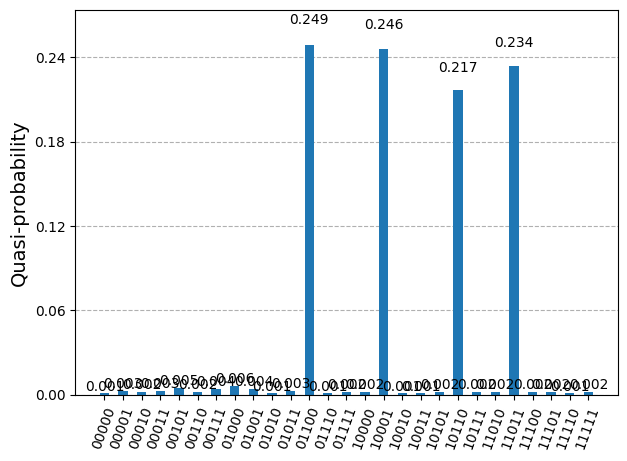

In [10]:
qc_transpiled = transpile(qc, simulator, basis_gates=basis_gates)
print(qc_transpiled.depth())
job = simulator.run(qc_transpiled, shots=1000)
counts = job.result().get_counts(qc_transpiled)
plot_distribution(counts)

In [11]:
test_qc_transpiled = transpile(
    circuits=test_qc, basis_gates=basis_gates, backend=simulator
)
print(test_qc_transpiled.depth())
# test_job = simulator.run(test_qc_transpiled, shots=1000)
# test_counts = test_job.result().get_counts(test_qc_transpiled)
# plot_distribution(test_counts)

99


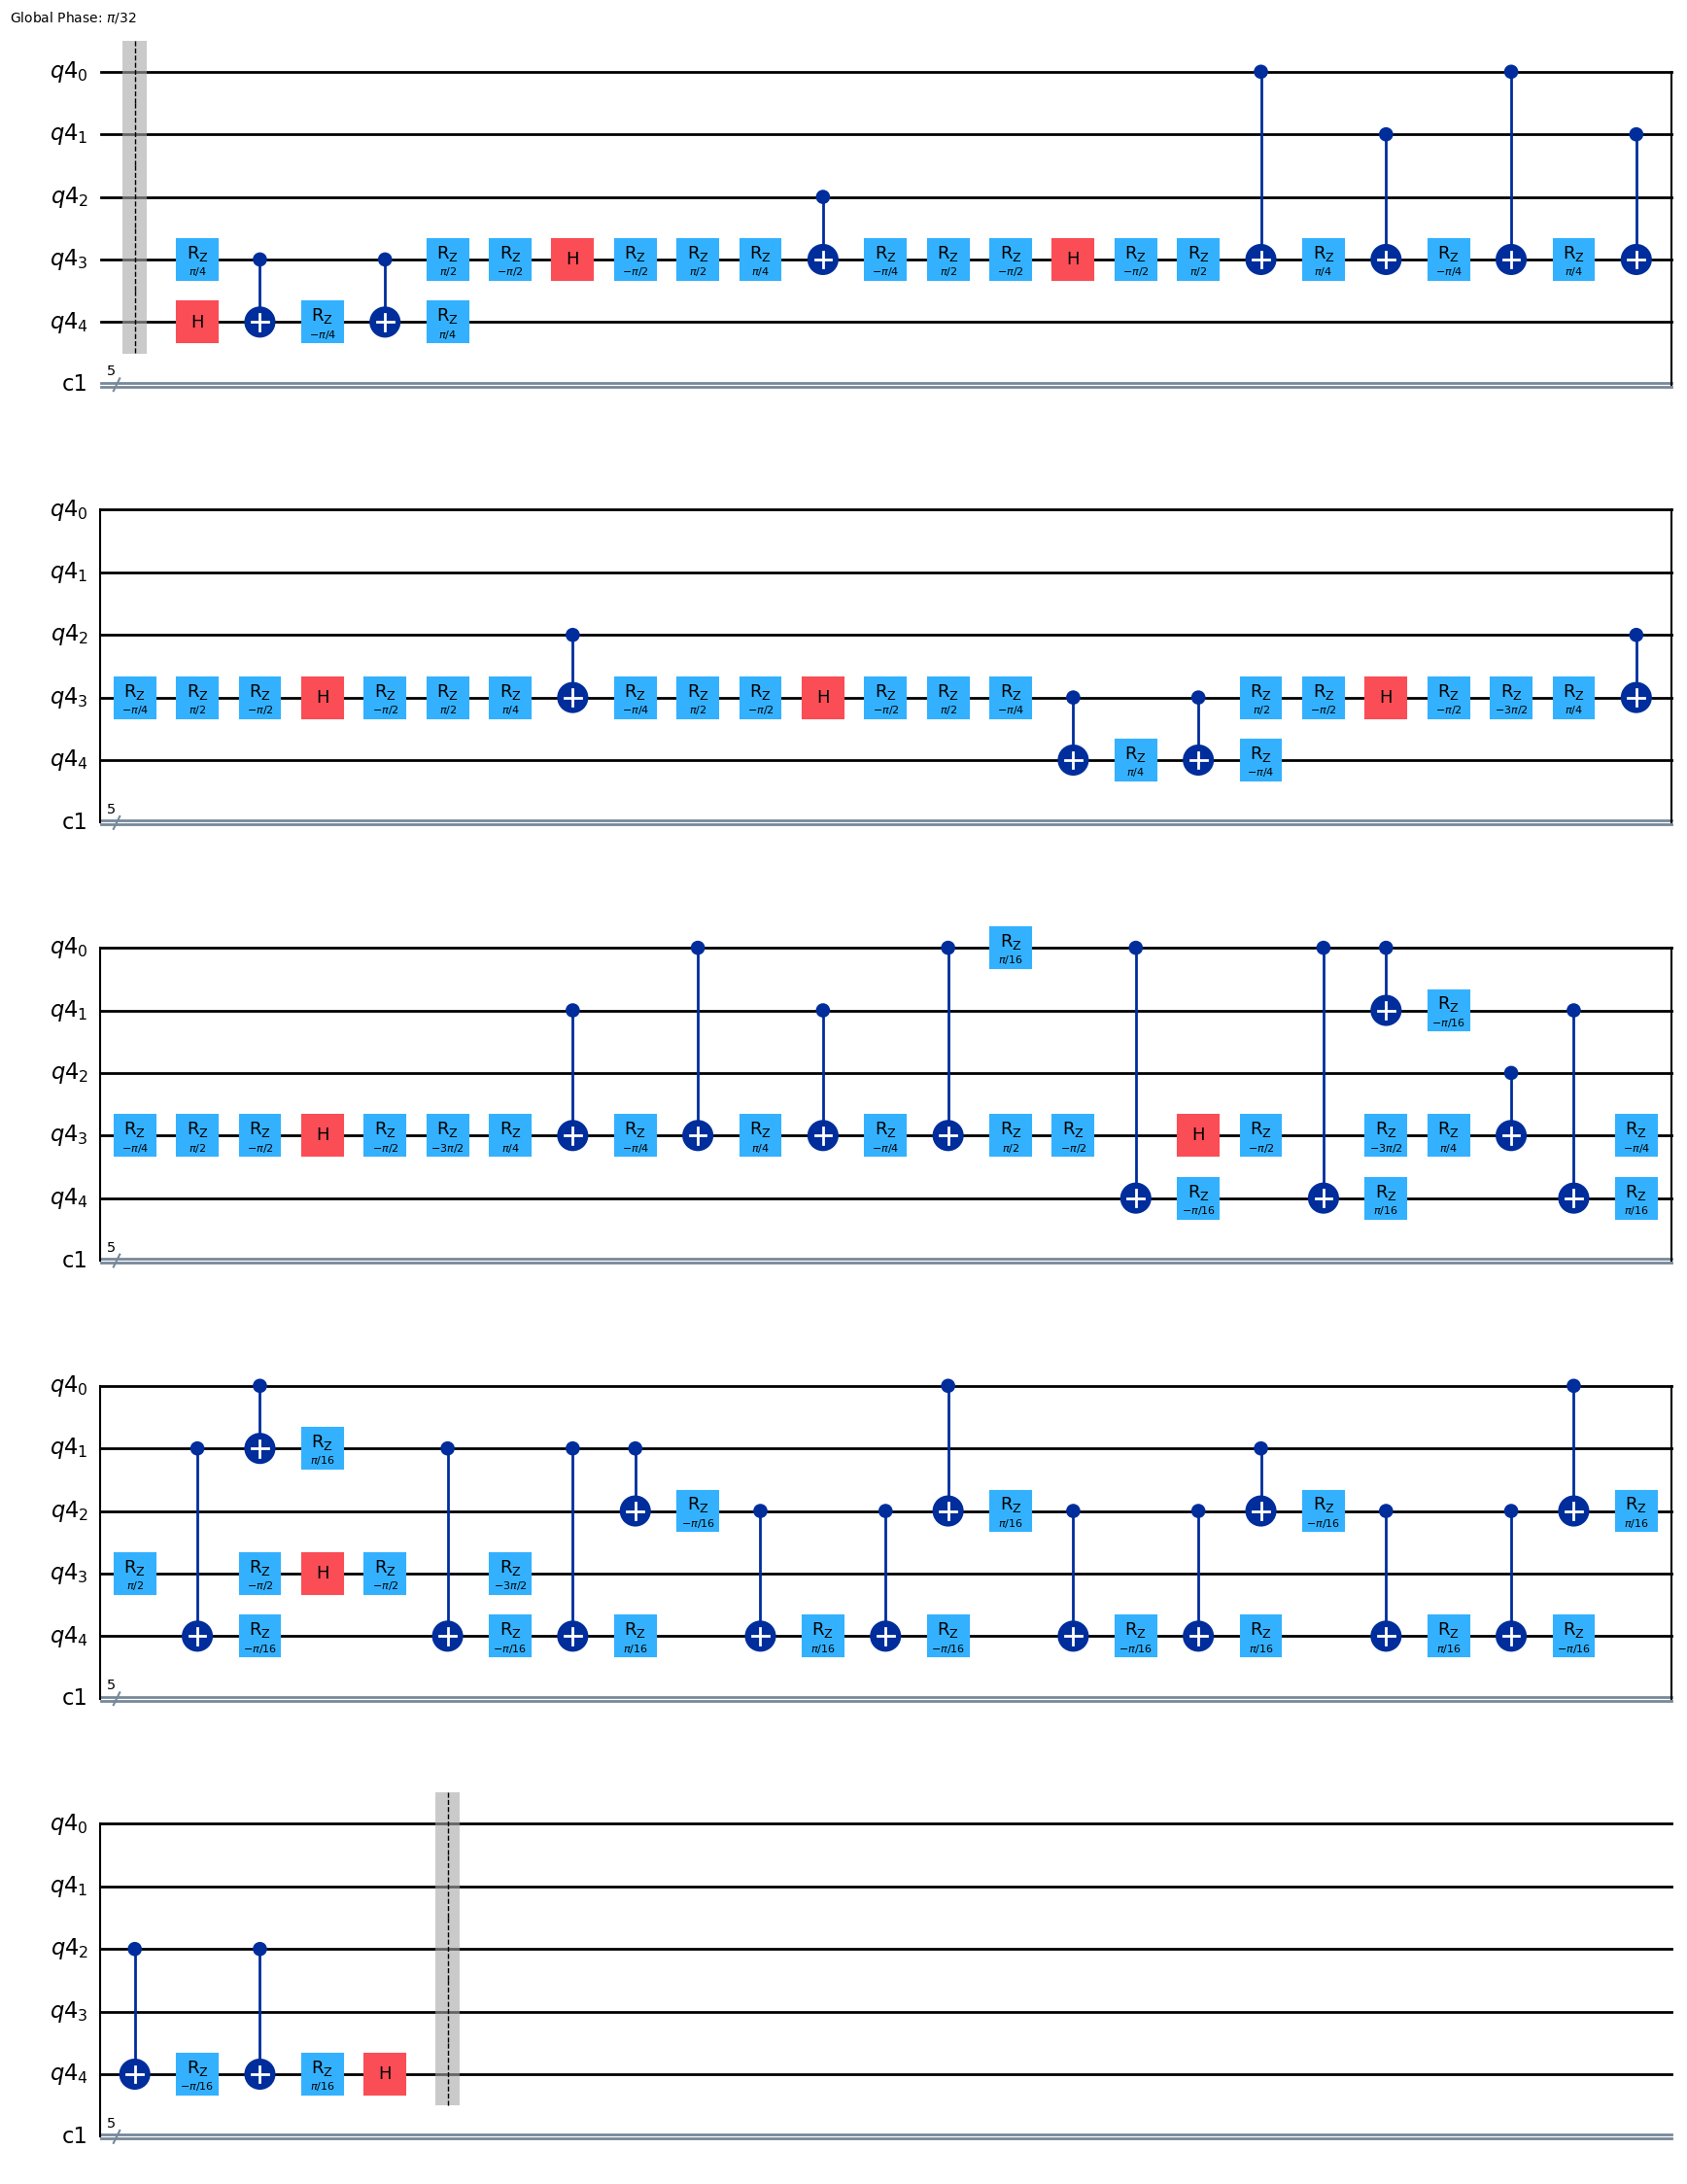

In [12]:
test_qc_transpiled.draw("mpl")